# Emotion Recognition CNN - Data Analysis & Model Evaluation

This notebook provides comprehensive analysis and evaluation of the emotion recognition CNN model trained on combined RAF-DB and FER-2013 datasets.

## 1. Import Required Libraries

Import necessary libraries for data analysis, model evaluation, and visualization.

In [1]:
import sys
# sys.path.insert(0, '/Users/romanminakov/Personal/Studies/Sem6/RI/RI-Project/src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import keras
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 2. Load Model and Dataset

Load the trained emotion recognition model and prepare the test dataset for evaluation.

In [2]:
from src.dataset_utils import get_combined_datasets

model_path = Path('models/final_model.keras')
print(f"Loading model from: {model_path}")
model = keras.models.load_model(str(model_path))

print(f"\nModel loaded successfully!")
print(f"Model input shape: {model.input_shape}")
print(f"Model output shape: {model.output_shape}")

print("\nLoading combined dataset (RAF-DB + FER-2013)...")
train_ds, val_ds, test_ds = get_combined_datasets(batch_size=32)

print("  Dataset loaded!")
print(f"  Train dataset: Available")
print(f"  Validation dataset: Available")
print(f"  Test dataset: Available")

Loading model from: models/final_model.keras


2025-10-18 00:07:56.522393: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-10-18 00:07:56.522434: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-10-18 00:07:56.522438: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-10-18 00:07:56.522456: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-18 00:07:56.522470: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)



Model loaded successfully!
Model input shape: (None, 128, 128, 3)
Model output shape: (None, 7)

Loading combined dataset (RAF-DB + FER-2013)...
Dataset is already downloaded
Found 12271 files belonging to 7 classes.
Using 10431 files for training.
Found 12271 files belonging to 7 classes.
Using 1840 files for validation.
Found 3068 files belonging to 7 classes.
Dataset is already downloaded
Found 28709 files belonging to 7 classes.
Using 24403 files for training.
Found 28709 files belonging to 7 classes.
Using 4306 files for validation.
Found 7178 files belonging to 7 classes.
  Dataset loaded!
  Train dataset: Available
  Validation dataset: Available
  Test dataset: Available


## 3. Define Emotion Labels and Extract Predictions

Define the emotion labels and generate predictions on the test set.

In [3]:
EMOTION_LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

print("Emotion Labels:")
for idx, emotion in enumerate(EMOTION_LABELS):
    print(f"  {idx}: {emotion}")

print("\nGenerating predictions on test set...")
all_predictions = []
all_true_labels = []
all_pred_probs = []

for images, labels in test_ds:
    pred_probs = model.predict(images, verbose=0)
    pred_classes = np.argmax(pred_probs, axis=1)
    
    all_predictions.extend(pred_classes)
    all_true_labels.extend(labels.numpy())
    all_pred_probs.extend(pred_probs)

all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)
all_pred_probs = np.array(all_pred_probs)

print(f"  Generated predictions for {len(all_predictions)} samples")

Emotion Labels:
  0: Angry
  1: Disgust
  2: Fear
  3: Happy
  4: Neutral
  5: Sad
  6: Surprise

Generating predictions on test set...


2025-10-18 00:08:00.861878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


  Generated predictions for 10246 samples


2025-10-18 00:08:19.288048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## 4. Overall Model Performance Metrics

Calculate and display overall accuracy, precision, recall, and F1-score.

In [4]:
accuracy = accuracy_score(all_true_labels, all_predictions)
precision_macro = precision_score(all_true_labels, all_predictions, average='macro', zero_division=0)
recall_macro = recall_score(all_true_labels, all_predictions, average='macro', zero_division=0)
f1_macro = f1_score(all_true_labels, all_predictions, average='macro', zero_division=0)

print("=" * 70)
print("OVERALL MODEL PERFORMANCE")
print("=" * 70)
print(f"Overall Accuracy:     {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Macro Precision:      {precision_macro:.4f}")
print(f"Macro Recall:         {recall_macro:.4f}")
print(f"Macro F1-Score:       {f1_macro:.4f}")
print("=" * 70)

baseline_accuracy = 1.0 / len(EMOTION_LABELS)
print(f"\nBaseline Accuracy (random): {baseline_accuracy:.4f} ({baseline_accuracy*100:.2f}%)")
print(f"Model improvement over baseline: {(accuracy - baseline_accuracy)*100:.2f}%")

OVERALL MODEL PERFORMANCE
Overall Accuracy:     0.6646 (66.46%)
Macro Precision:      0.6334
Macro Recall:         0.5814
Macro F1-Score:       0.5966

Baseline Accuracy (random): 0.1429 (14.29%)
Model improvement over baseline: 52.17%


## 5. Confusion Matrix Visualization

Visualize the confusion matrix to understand which emotions are confused with each other.

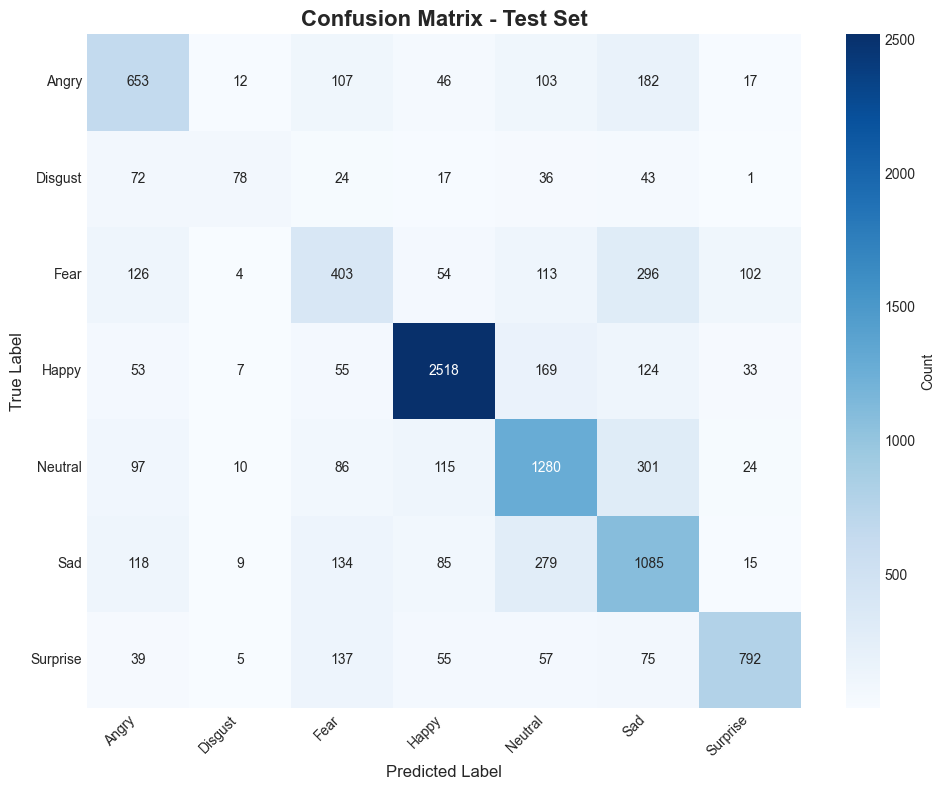

Confusion Matrix saved


In [5]:
cm = confusion_matrix(all_true_labels, all_predictions)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=EMOTION_LABELS, yticklabels=EMOTION_LABELS,
            cbar_kws={'label': 'Count'}, ax=ax)
plt.title('Confusion Matrix - Test Set', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Confusion Matrix saved")

## 6. Per-Class Performance Metrics

Analyze precision, recall, and F1-score for each emotion class.


Detailed Classification Report:
              precision  recall  f1-score     support
Angry            0.5639  0.5830    0.5733   1120.0000
Disgust          0.6240  0.2878    0.3939    271.0000
Fear             0.4260  0.3670    0.3943   1098.0000
Happy            0.8713  0.8510    0.8610   2959.0000
Neutral          0.6284  0.6691    0.6481   1913.0000
Sad              0.5152  0.6290    0.5664   1725.0000
Surprise         0.8049  0.6828    0.7388   1160.0000
accuracy         0.6646  0.6646    0.6646      0.6646
macro avg        0.6334  0.5814    0.5966  10246.0000
weighted avg     0.6706  0.6646    0.6640  10246.0000


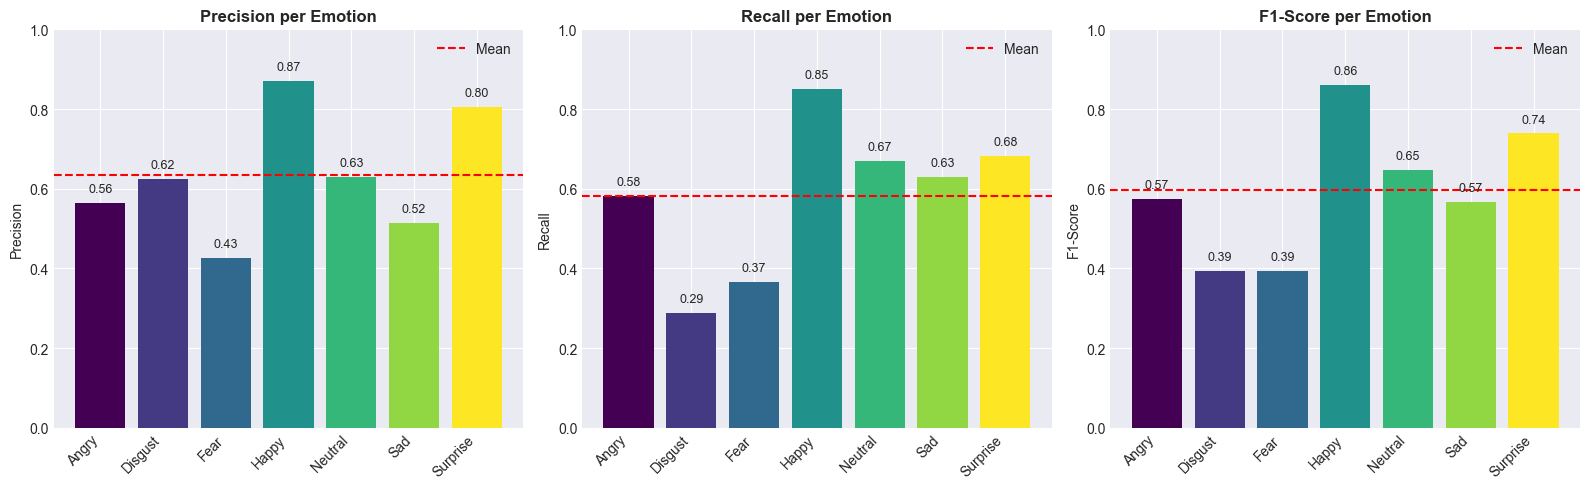

In [6]:
class_report = classification_report(all_true_labels, all_predictions, 
                                     target_names=EMOTION_LABELS, 
                                     output_dict=True)

report_df = pd.DataFrame(class_report).transpose()
print("\nDetailed Classification Report:")
print(report_df.round(4))

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

metrics = ['precision', 'recall', 'f1-score']
for idx, metric in enumerate(metrics):
    values = [class_report[emotion][metric] for emotion in EMOTION_LABELS]
    colors = plt.cm.viridis(np.linspace(0, 1, len(EMOTION_LABELS)))
    
    axes[idx].bar(EMOTION_LABELS, values, color=colors)
    axes[idx].set_title(f'{metric.title()} per Emotion', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(metric.title(), fontsize=10)
    axes[idx].set_ylim([0, 1])
    axes[idx].axhline(y=np.mean(values), color='red', linestyle='--', label='Mean')
    axes[idx].legend()
    
    axes[idx].set_xticklabels(EMOTION_LABELS, rotation=45, ha='right')
    
    for i, v in enumerate(values):
        axes[idx].text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 7. Prediction Confidence Analysis

Analyze the model's confidence levels for correct and incorrect predictions.

Correct Predictions: 6809
  Mean Confidence: 0.8053
  Min Confidence: 0.2253
  Max Confidence: 1.0000
  Std Dev: 0.2033

Incorrect Predictions: 3437
  Mean Confidence: 0.5797
  Min Confidence: 0.1920
  Max Confidence: 1.0000
  Std Dev: 0.1879


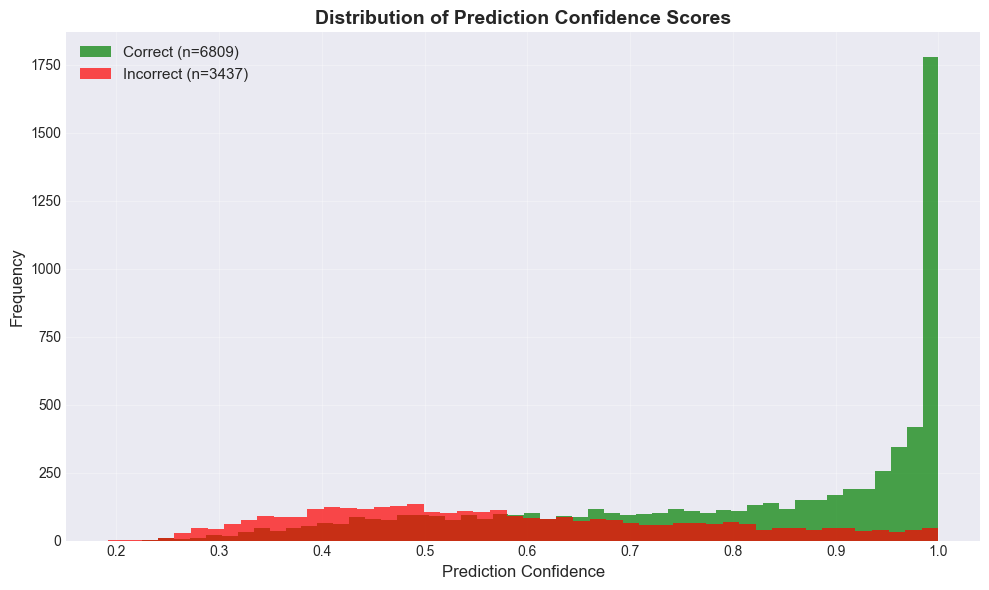

In [7]:
max_probs = np.max(all_pred_probs, axis=1)

correct_mask = all_predictions == all_true_labels
correct_probs = max_probs[correct_mask]
incorrect_probs = max_probs[~correct_mask]

print(f"Correct Predictions: {len(correct_probs)}")
print(f"  Mean Confidence: {np.mean(correct_probs):.4f}")
print(f"  Min Confidence: {np.min(correct_probs):.4f}")
print(f"  Max Confidence: {np.max(correct_probs):.4f}")
print(f"  Std Dev: {np.std(correct_probs):.4f}")

print(f"\nIncorrect Predictions: {len(incorrect_probs)}")
if len(incorrect_probs) > 0:
    print(f"  Mean Confidence: {np.mean(incorrect_probs):.4f}")
    print(f"  Min Confidence: {np.min(incorrect_probs):.4f}")
    print(f"  Max Confidence: {np.max(incorrect_probs):.4f}")
    print(f"  Std Dev: {np.std(incorrect_probs):.4f}")

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(correct_probs, bins=50, alpha=0.7, label=f'Correct (n={len(correct_probs)})', color='green')
if len(incorrect_probs) > 0:
    ax.hist(incorrect_probs, bins=50, alpha=0.7, label=f'Incorrect (n={len(incorrect_probs)})', color='red')

ax.set_xlabel('Prediction Confidence', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Prediction Confidence Scores', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Emotion Distribution in Test Set

Analyze the distribution of emotions in the test dataset.

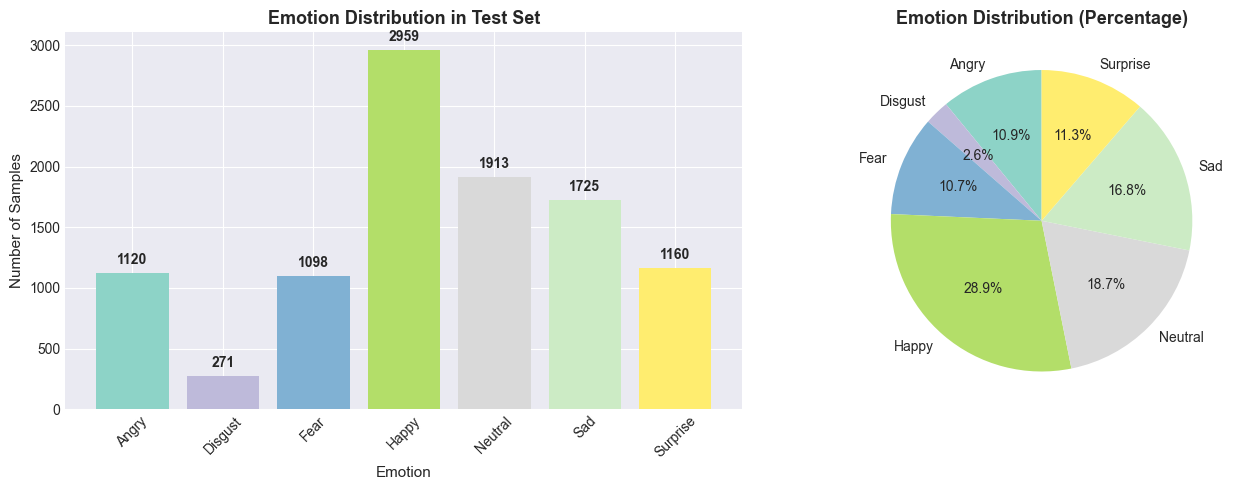


Emotion Distribution in Test Set:
  Angry       :  1120 samples (10.93%)
  Disgust     :   271 samples ( 2.64%)
  Fear        :  1098 samples (10.72%)
  Happy       :  2959 samples (28.88%)
  Neutral     :  1913 samples (18.67%)
  Sad         :  1725 samples (16.84%)
  Surprise    :  1160 samples (11.32%)


In [8]:
emotion_counts = pd.Series(all_true_labels).value_counts().sort_index()
emotion_names = [EMOTION_LABELS[i] for i in emotion_counts.index]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = plt.cm.Set3(np.linspace(0, 1, len(EMOTION_LABELS)))
axes[0].bar(emotion_names, emotion_counts.values, color=colors)
axes[0].set_title('Emotion Distribution in Test Set', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Number of Samples', fontsize=11)
axes[0].set_xlabel('Emotion', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(emotion_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

axes[1].pie(emotion_counts.values, labels=emotion_names, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Emotion Distribution (Percentage)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nEmotion Distribution in Test Set:")
for emotion, count in zip(emotion_names, emotion_counts.values):
    percentage = (count / len(all_true_labels)) * 100
    print(f"  {emotion:<12}: {count:>5} samples ({percentage:>5.2f}%)")

## 9. Model Summary and Architecture

Display the trained model architecture and parameter information.

In [9]:
print("Model Architecture:")
print("=" * 70)
model.summary()

total_params = model.count_params()
print(f"\nTotal Model Parameters: {total_params:,}")

print(f"\nModel Input Shape: {model.input_shape}")
print(f"Model Output Shape: {model.output_shape}")
print(f"Number of Layers: {len(model.layers)}")
print(f"Number of Emotion Classes: {len(EMOTION_LABELS)}")

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,324,727 (16.50 MB)

 Trainable params: 1,440,423 (5.49 MB)

 Non-trainable params: 3,456 (13.50 KB)

 Optimizer params: 2,880,848 (10.99 MB)


Total Model Parameters: 1,443,879

Model Input Shape: (None, 128, 128, 3)
Model Output Shape: (None, 7)
Number of Layers: 32
Number of Emotion Classes: 7
